<a href="https://colab.research.google.com/github/azadranjith/tensorflow/blob/main/fashion_mnsit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#FASHION_MNIST

In [13]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [3]:
fashion_mnist = tf.keras.datasets.fashion_mnist

In [9]:
(x_train,y_train),(x_test,y_test) = fashion_mnist.load_data()

### exploring the data

In [11]:
x_train.shape
#60000 28x28 pixel images

(60000, 28, 28)

In [12]:
#show image 
# import cv2 as cv
from google.colab.patches import cv2_imshow
cv2_imshow(x_train[1])

In [14]:
y_train[1]

0

In [15]:
#we needed to map each label into numbers
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [17]:
y_train.max()

9

In [18]:
y_train.min()

0

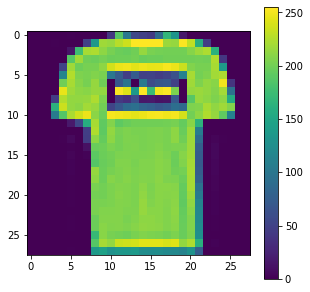

In [29]:
#
plt.figure(figsize=(5,5))
plt.imshow(x_train[1])
plt.colorbar()
plt.show()

when value is 0 color is violet and when value is 255 yellow-green

**these pixel values are varying tooo much scale them b/w one and zero** 

In [31]:
type(y_train)#all datas are in numpy array type

numpy.ndarray

In [58]:
x_train = x_train/255.0
x_test = x_test/255.0

show a batch of images and their labels

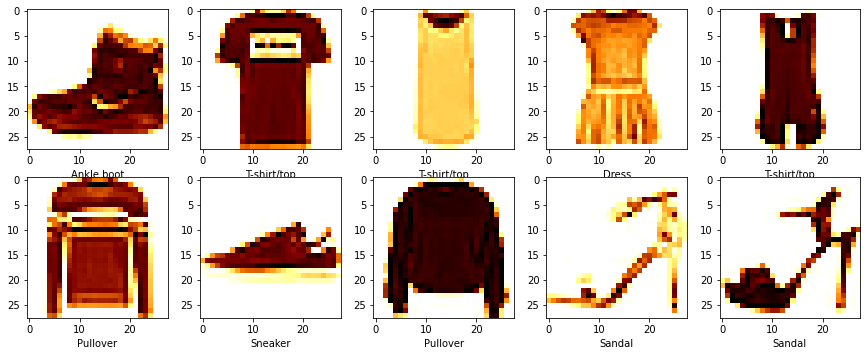

In [57]:
plt.figure(figsize=(15,15))
for i in range(10):
  plt.subplot(5,5,i+1)
  plt.imshow(x_train[i],cmap=plt.cm.afmhot_r)
  plt.xlabel(class_names[y_train[i]])
  # plt.grid(False)
plt.show()

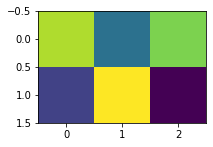

In [59]:
plt.figure(figsize=(3,4)) #figure with 3,4 size
plt.imshow([[225,95,205],[50,255,0]])
plt.show()

## building the model

creating and configuring the layers and comiple with loss accuracy optimizer

layers are the building blocks of the nueral network

layers extract the patterns from the data its getting

In [78]:
model1 = tf.keras.models.Sequential(
    [
        tf.keras.layers.Flatten(input_shape=(28,28)),#flattens the input into 1d tensor here of shape 784
        tf.keras.layers.Dense(128,activation='relu'),
        tf.keras.layers.Dense(56,activation='relu',),#these fully connected layer has weights associated with them
        tf.keras.layers.Dense(10,activation='softmax',name = 'model1_layer2')
    ]
)

In [107]:
model2 = tf.keras.models.Sequential(name='fashion')

model2.add(tf.keras.layers.Flatten(input_shape=(28,28),name = 'flatten_layer'))
model2.add(tf.keras.layers.Dense(526,activation='relu',name = 'layer1'))#fully connected layers with 526 nodes 
model2.add(tf.keras.layers.Dense(126,activation='relu',name = 'layer2'))
model2.add(tf.keras.layers.Dense(56,activation='relu',name = 'layer3'))#these last layer is same as the number of class 
model2.add(tf.keras.layers.Dense(10,activation='softmax',name = 'softmax_layer'))

In [ ]:
#weights associated with fully connected layer

model2.layers[3].weights

In [ ]:
model1.get_layer('model1_layer2').weights

**compiling the model**

adding 
1. **loss function** --ie how well the model is performing

2. **optimizer**    --way to update parameters based on loss

3. **metrics**  --to find the accuracy of the model



In [81]:
model1.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    optimizer='sgd',
    metrics=['accuracy']
)

In [97]:
model2.compile(
    loss=tf.keras.losses.mean_squared_error,
    optimizer='adam',
    metrics=['mse','mae']

)

In [ ]:
#checking the model by inputing

z = tf.ones([28,28],tf.int32)


In [87]:
model1.fit(x_train,y_train,epochs = 5)

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 2.2985 - accuracy: 0.1432
Epoch 2/5
1875/1875 [==============================] - 5s 3ms/step - loss: 2.2971 - accuracy: 0.1720
Epoch 3/5
1875/1875 [==============================] - 6s 3ms/step - loss: 2.2952 - accuracy: 0.1963
Epoch 4/5
1875/1875 [==============================] - 6s 3ms/step - loss: 2.2928 - accuracy: 0.2015
Epoch 5/5
1875/1875 [==============================] - 6s 3ms/step - loss: 2.2895 - accuracy: 0.2237


In [98]:
model2.fit(x_train,y_train,epochs = 10)

Epoch 1/10
1875/1875 [==============================] - 5s 2ms/step - loss: 27.6101 - mse: 27.6101 - mae: 4.4200
Epoch 2/10
1875/1875 [==============================] - 5s 2ms/step - loss: 27.6101 - mse: 27.6101 - mae: 4.4200
Epoch 3/10
1875/1875 [==============================] - 5s 2ms/step - loss: 27.6101 - mse: 27.6101 - mae: 4.4200
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 27.6101 - mse: 27.6101 - mae: 4.4200
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 27.6101 - mse: 27.6101 - mae: 4.4200
Epoch 6/10
1875/1875 [==============================] - 5s 2ms/step - loss: 27.6101 - mse: 27.6101 - mae: 4.4200
Epoch 7/10
1875/1875 [==============================] - 5s 2ms/step - loss: 27.6101 - mse: 27.6101 - mae: 4.4200
Epoch 8/10
1875/1875 [==============================] - 5s 2ms/step - loss: 27.6101 - mse: 27.6101 - mae: 4.4200
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 27.6101 - mse: 27.61

In [108]:
model2.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    optimizer='adam',
    metrics=['accuracy','mse','mae']
)

In [109]:
model2.fit(x_train,y_train,epochs = 5)

Epoch 1/5
1875/1875 [==============================] - 14s 7ms/step - loss: 0.7636 - accuracy: 0.7125 - mse: 27.6586 - mae: 4.4200
Epoch 2/5
1875/1875 [==============================] - 13s 7ms/step - loss: 0.5034 - accuracy: 0.8160 - mse: 27.6726 - mae: 4.4200
Epoch 3/5
1875/1875 [==============================] - 13s 7ms/step - loss: 0.4366 - accuracy: 0.8399 - mse: 27.6764 - mae: 4.4200
Epoch 4/5
1875/1875 [==============================] - 14s 7ms/step - loss: 0.3949 - accuracy: 0.8549 - mse: 27.6788 - mae: 4.4200
Epoch 5/5
1875/1875 [==============================] - 19s 10ms/step - loss: 0.3707 - accuracy: 0.8644 - mse: 27.6802 - mae: 4.4200


In [99]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10)
])

In [100]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [101]:
model.fit(x_train,y_train,epochs = 5)

Epoch 1/5
1875/1875 [==============================] - 6s 3ms/step - loss: 1.0626 - accuracy: 0.6672
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6252 - accuracy: 0.7754
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5511 - accuracy: 0.8036
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5110 - accuracy: 0.8190
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4850 - accuracy: 0.8284


In [110]:
test_loss, test_acc = model.evaluate(x_test,  y_test, verbose=2)

313/313 - 1s - loss: 0.5026 - accuracy: 0.8188 - 787ms/epoch - 3ms/step


In [111]:
test_loss, test_acc = model1.evaluate(x_test,  y_test, verbose=2)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


313/313 - 1s - loss: 2.2873 - accuracy: 0.2856 - 1s/epoch - 3ms/step


In [114]:
test_loss, test_acc, t,k= model2.evaluate(x_test,  y_test, verbose=2)

313/313 - 1s - loss: 0.3961 - accuracy: 0.8534 - mse: 27.6795 - mae: 4.4200 - 729ms/epoch - 2ms/step


In [115]:
predictions = model2.predict(x_test)

In [117]:
predictions.shape

(10000, 10)

In [136]:
predictions.max(axis=1)

array([0.9119681 , 0.9254246 , 0.9998908 , ..., 0.9986343 , 0.9992015 ,
       0.99177116], dtype=float32)

In [139]:
class_names[np.argmax(predictions[0])]

'Ankle boot'

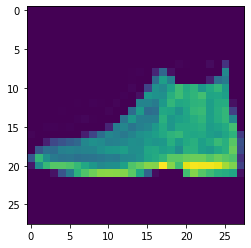

In [137]:
plt.imshow(x_test[0])

In [ ]:
selecting all the col